# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')
## modificar tamany figura
from matplotlib.pyplot import figure
from math import sqrt
from statistics import mean 

import os


## Train & test
from sklearn.model_selection import train_test_split


## errors

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## plot DT
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Random forest
from sklearn.ensemble import RandomForestRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Funcions

In [2]:
 def plot_feat_imp(model, number,predictors):
    feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)


    feat_imp = feat_imp[0:number]
    name = []
    for i in feat_imp.index.tolist():
        name.append(predictors[i])


    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
    plt.ylabel('Feature Importance Score')


def real_scores(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    r2_test = round(model.score(X_test, Y_test), 4)
    pred_test = np.round(model.predict(X_test))
    mse_test = round(mean_squared_error(Y_test, pred_test), 4)
    rmse_test = round(mean_squared_error(Y_test, pred_test, squared = False), 4)
    mae_test = round(mean_absolute_error(Y_test, pred_test), 4)
    scores = pd.DataFrame([r2_test, mse_test, rmse_test, mae_test])
    scores = scores.rename(columns={0: "Scores"}, index={0:"R2", 1:"MSE", 2:"RMSE", 3:"MAE"})
    
    return [print(scores)]


## Càrrega de dades

In [3]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df = pd.read_csv(mainpath + "dfModel.csv", sep = ",")
dfReal = pd.read_csv(mainpath + "dfReals.csv", sep = ",")

In [4]:
df = df[['NHab',
 'S2H',
 'S3H',
 'S52H',
 'PreuHab',
 'diaAño',
 'weather',
 'temp',
 'mes',
 #'diaSemana',
 #'findes',
 #'idhotel_DON',
 #'idhotel_MME',
 'idhotel_PAV',
 #'idhotel_SAL',
 'idhotel_TAU',
 #'idhotel_TOS',
 'idcliente_OL_MEDITERRANEO',
 'idcliente_Otros',
 'idcliente_TUI_UK_LTD',
 'idtipohab_FAM',
 #'idtipohab_IND',
 'idtipohab_PREM',
 'idtipohab_SUI',
 'idregimen_MP',
 'idregimen_PC',
 #'idregimen_SHAB',
 'idregimen_TI',
 'idsegmento_VACAC',
 #'id_canal_DIRECTO',
 'id_canal_GRUPOS',
 #'id_canal_ONLINE',
 'id_canal_TTOO',
 #'idpais_cliente_EAU',
 #'idpais_cliente_EE',
 'idpais_cliente_ES',
 'idpais_cliente_ESC',
 #'idpais_cliente_GB',
 #'idpais_cliente_IS',
 #'idpais_cliente_OE',
 'temporada_baja',
 #'holiday_No festiu',
 'fechaocupacion'
 ]]



En les dades reals no hi ha cap variable que sigui *idpais_cliente_ESC*, per tant, es crea una variable amb aquest nom, plena de zeros, i s'afegeix en les dades reals per tal de poder fer les prediccions, ja que han de quadrar totes les variables.

In [5]:
dfReal = dfReal[['NHab',
 'S2H',
 'S3H',
 'S52H',
 'PreuHab',
 'diaAño',
 'weather',
 'temp',
 'mes',
 #'diaSemana',
 #'findes',
 #'idhotel_DON',
 #'idhotel_MME',
 'idhotel_PAV',
 #'idhotel_SAL',
 'idhotel_TAU',
 #'idhotel_TOS',
 'idcliente_OL_MEDITERRANEO',
 'idcliente_Otros',
 'idcliente_TUI_UK_LTD',
 'idtipohab_FAM',
 #'idtipohab_IND',
 'idtipohab_PREM',
 'idtipohab_SUI',
 'idregimen_MP',
 'idregimen_PC',
 #'idregimen_SHAB',
 'idregimen_TI',
 'idsegmento_VACAC',
 #'id_canal_DIRECTO',
 'id_canal_GRUPOS',
 #'id_canal_ONLINE',
 'id_canal_TTOO',
 #'idpais_cliente_EAU',
 #'idpais_cliente_EE',
 'idpais_cliente_ES',
 #'idpais_cliente_ESC',
 #'idpais_cliente_GB',
 #'idpais_cliente_IS',
 #'idpais_cliente_OE',
 'temporada_baja',
 #'holiday_No festiu',
 'fechaocupacion'
 ]]

In [6]:
dfReal = dfReal.assign(**dict.fromkeys('A',0))
dfReal = dfReal.rename(columns={"A":"idpais_cliente_ESC"})

# Train i test

In [7]:
features_df = df.drop(['NHab',], axis = 1)
target = df.NHab

x_train, x_test, y_train, y_test = train_test_split(features_df.drop(['fechaocupacion', 'diaAño'], axis = 1), target, random_state=0)
train = x_train.join(y_train)
test = x_test.join(y_test)

x_real = dfReal.drop(['NHab', 'fechaocupacion', 'diaAño'], axis = 1)
y_real = dfReal.NHab

x_real_ago = dfReal[dfReal['fechaocupacion'].str.contains("2019-08")][features_df.drop(['fechaocupacion', 'diaAño'], axis = 1).columns.tolist()]
x_real_set = dfReal[dfReal['fechaocupacion'].str.contains("2019-09")][features_df.drop(['fechaocupacion', 'diaAño'], axis = 1).columns.tolist()]

y_real_ago = dfReal[dfReal['fechaocupacion'].str.contains("2019-08")][['NHab']]
y_real_set = dfReal[dfReal['fechaocupacion'].str.contains("2019-09")][['NHab']]

# Random forest

S'ajusta el model escollit

In [8]:
rf = RandomForestRegressor(ccp_alpha = 0.01,
 max_depth = 12,
 max_features = 10,
 min_samples_leaf = 2,
 min_samples_split = 2,
 min_impurity_decrease = 0.0,
 n_estimators = 20,
 random_state = 42,
 n_jobs = -1)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.01, criterion='mse',
                      max_depth=12, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [9]:
print("Scores per a les dades reals:")
real_scores(rf,x_train,y_train,x_real,y_real)
print("Scores per a les dades reals del mes d'agost':")
real_scores(rf,x_train,y_train,x_real_ago,y_real_ago)
print("Scores per a les dades reals del mes de setembre:")
real_scores(rf,x_train,y_train,x_real_set,y_real_set)

Scores per a les dades reals:
      Scores
R2    0.9701
MSE   5.0935
RMSE  2.2569
MAE   0.9664


[None]

Scores per a les dades reals del mes d'agost':
      Scores
R2    0.9674
MSE   5.4364
RMSE  2.3316
MAE   1.0101


[None]

Scores per a les dades reals del mes de setembre:
      Scores
R2    0.9732
MSE   4.6733
RMSE  2.1618
MAE   0.9120


[None]

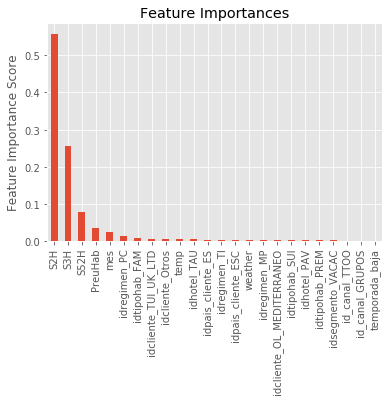

In [10]:
plot_feat_imp(rf, x_real.shape[1], x_real.columns.tolist())

# Visualització

Es representaran gràficament els resultats per a l'hotel *PAV* i l'hotel *TAU*

In [11]:
y_pred = np.round(rf.predict(x_real))

dfGroup =  df.groupby(['fechaocupacion', 'diaAño', 'idhotel_PAV', 'idhotel_TAU'], as_index = False).sum()

hotels = ['idhotel_PAV', 'idhotel_TAU']

## Diccionari hotels i dia agrupats, per a les dades d'entrenament
dict_day_real = {}
for hotel in hotels:
    dict_day_real[hotel] = dfGroup[dfGroup[hotel] == 1]

key_hotels = []
for key in dict_day_real.keys():
    key_hotels.append(key)

In [12]:
dfErr = pd.DataFrame(columns={'Real' , 'Pred'})
dfErr['Real'] = y_real
dfErr['Pred'] = y_pred

In [13]:
dfErr['MSE'] = np.power(dfErr['Real'] - dfErr['Pred'],2)
dfErr['RMSE'] = np.sqrt(dfErr['MSE'])
dfErr['MAE'] = np.abs(dfErr['Real'] - dfErr['Pred'])
dfErr['RMSE'].sum()/y_pred.shape[0]
dfErr['MAE'].sum()/y_pred.shape[0]

dfErr['MSE'].sum()/y_pred.shape[0]

0.966379827896738

0.966379827896738

5.093522780334868

L'objectiu d'aquests diccionaris és guardar les dades agrupades per als hotels que es desitja fer la representació gràfica.

In [14]:
dfPred = pd.DataFrame({'Prediccions': y_pred.astype('int')}).join(dfReal[['NHab', 'fechaocupacion', 'diaAño', 'idhotel_PAV', 'idhotel_TAU']])
dfByDay = dfPred.groupby(['fechaocupacion', 'diaAño', 'idhotel_PAV', 'idhotel_TAU'], as_index = False).sum()
hotels = ['idhotel_PAV', 'idhotel_TAU']

dict_day = {}
for hotel in hotels:
    dict_day[hotel] = dfByDay[dfByDay[hotel] == 1]
    

En el següent pas es busquen el nombre m'axim d'habitacions ocupades per a cada hotel en les dades reals ja passades, per saber quin és el màxim d'habitacions que es poden omplir i forçar aquest valor com el màxim valor que poden prendre les prediccions.

In [15]:
for hotel in key_hotels:
    dict_day[hotel].loc[dict_day[hotel]['Prediccions'] > dict_day_real[hotel]['NHab'].max(), 'Prediccions'] =  dict_day_real[hotel]['NHab'].max()

dfByDayOK = pd.DataFrame(columns = dfByDay.columns.tolist())
for hotel in key_hotels:
    dfByDayOK = dfByDayOK.append(dict_day[hotel])

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Finalment es pinten les prediccions.


## Agost 2019

Text(0.5, 1.0, 'Prediccions per a idhotel_PAV, agost 2019')

[213, 245, 303, 423]

Text(0, 0.5, "Número d'habitacions ocupades")

Text(0.5, 0, "Dia de l'any")

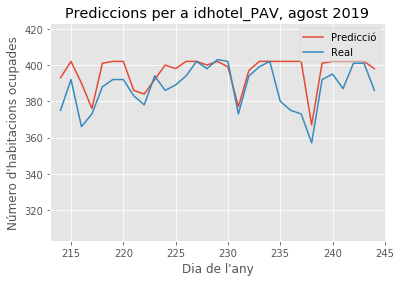

Text(0.5, 1.0, 'Prediccions per a idhotel_TAU, agost 2019')

[213, 245, 337, 457]

Text(0, 0.5, "Número d'habitacions ocupades")

Text(0.5, 0, "Dia de l'any")

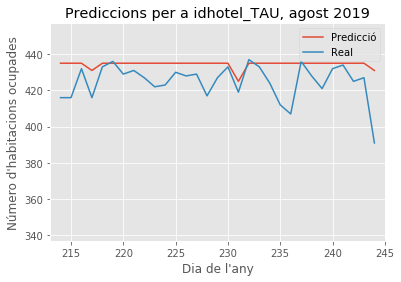

In [16]:
ago_plot = dfByDayOK[dfByDayOK['fechaocupacion'].str.contains("2019-08")]
set_plot = dfByDayOK[dfByDayOK['fechaocupacion'].str.contains("2019-09")]

ago_hotels = {}
for hotel in hotels:
    ago_hotels[hotel] = pd.DataFrame(ago_plot[ago_plot[hotel] == 1])


for key in key_hotels:
    plt.title("Prediccions per a {:s}, agost 2019".format(key))
    plt.axis([min(ago_hotels[key]['diaAño'])-1, max(ago_hotels[key]['diaAño'])+1, max(ago_hotels[key]['NHab'])-100, max(ago_hotels[key]['NHab'])+20])
    plt.ylabel("Número d'habitacions ocupades")
    plt.xlabel("Dia de l'any")
    plt.plot(ago_hotels[key]['diaAño'], ago_hotels[key]['Prediccions'], label = 'Predicció')
    plt.plot(ago_hotels[key]['diaAño'], ago_hotels[key]['NHab'], label = 'Real')
    plt.legend()
    plt.show()

## Setembre 2019

Text(0.5, 1.0, 'Prediccions per a idhotel_PAV, setembre 2019')

[244, 275, 0, 421]

Text(0, 0.5, "Número d'habitacions ocupades")

Text(0.5, 0, "Dia de l'any")

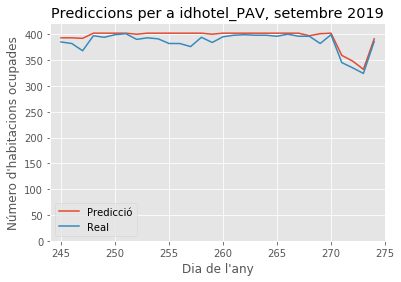

Text(0.5, 1.0, 'Prediccions per a idhotel_TAU, setembre 2019')

[244, 275, 0, 453]

Text(0, 0.5, "Número d'habitacions ocupades")

Text(0.5, 0, "Dia de l'any")

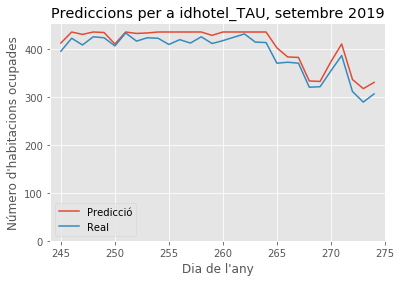

In [17]:
set_hotels = {}

for hotel in hotels:
    set_hotels[hotel] = pd.DataFrame(set_plot[set_plot[hotel] == 1])

key_hotels = []
for key in set_hotels.keys():
    key_hotels.append(key)
    
for key in key_hotels:
    plt.title("Prediccions per a {:s}, setembre 2019".format(key))
    plt.axis([min(set_hotels[key]['diaAño'])-1, max(set_hotels[key]['diaAño'])+1, 0, max(set_hotels[key]['NHab'])+20])
    plt.ylabel("Número d'habitacions ocupades")
    plt.xlabel("Dia de l'any")
    plt.plot(set_hotels[key]['diaAño'], set_hotels[key]['Prediccions'], label = 'Predicció')
    plt.plot(set_hotels[key]['diaAño'], set_hotels[key]['NHab'], label = 'Real')
    plt.legend()
    plt.show()